## Import modules

In [1]:
from __future__ import division, unicode_literals, print_function
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np, pandas as pd
import os.path, os, sys, json
import math
from math import sqrt
plt.rcParams.update({'font.size': 18, 'figure.figsize': [10.0, 8.0]})
workdir=%pwd
print (workdir)

/Users/mikael/github/SI-Lipase-Structure-Factors/experiments


## Plot experimental I(q)

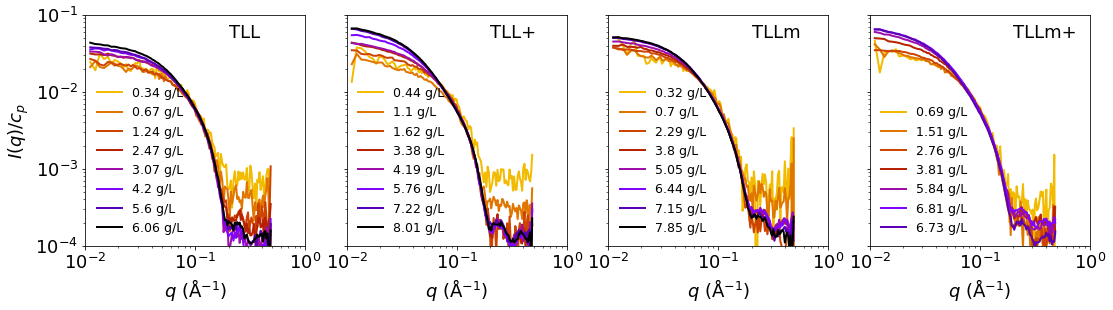

In [2]:
series='TLLm'

def plot_sofq(ax, series, xup=False):
    if series=="TLLm":
        conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85]
        q8, i8 = np.loadtxt("exp_data/1-nospirr_GLYC/RBS_A_02883_A1-T1_lipase_s1_000_c.dat", skiprows=3, usecols=(0,1), unpack=True)
        q7, i7 = np.loadtxt("exp_data/1-nospirr_GLYC/RBS_A_02885_B1-T1_lipase_s1_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q6, i6 = np.loadtxt("exp_data/1-nospirr_GLYC/RBS_A_02899_C1-T1_lipase_s1_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q5, i5 = np.loadtxt("exp_data/1-nospirr_GLYC/RBS_A_02901_D1-T1_lipase_s1_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q4, i4 = np.loadtxt("exp_data/1-nospirr_GLYC/RBS_A_02903_E1-T1_lipase_s1_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)  
        q3, i3 = np.loadtxt("exp_data/1-nospirr_GLYC/RBS_A_02887_F1-T1_lipase_s1_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q2, i2 = np.loadtxt("exp_data/1-nospirr_GLYC/RBS_A_02894_G1-T1_lipase_s1_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q1, i1 = np.loadtxt("exp_data/1-nospirr_GLYC/RBS_A_02896_H1-T1_lipase_s1_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)    

    if series=="TLL":
        conc_range = [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06] 
        q8, i8 = np.loadtxt("exp_data/2-nospirr_noglyc/RBS_A_02906_A2-T1_lipase_s2_000_c.dat", skiprows=3, usecols=(0,1), unpack=True)
        q7, i7 = np.loadtxt("exp_data/2-nospirr_noglyc/RBS_A_02909_B2-T1_lipase_s2_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q6, i6 = np.loadtxt("exp_data/2-nospirr_noglyc/RBS_A_02911_C2-T1_lipase_s2_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q5, i5 = np.loadtxt("exp_data/2-nospirr_noglyc/RBS_A_02914_D2-T1_lipase_s2_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q4, i4 = np.loadtxt("exp_data/2-nospirr_noglyc/RBS_A_02916_E2-T1_lipase_s2_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)  
        q3, i3 = np.loadtxt("exp_data/2-nospirr_noglyc/RBS_A_02923_F2-T1_lipase_s2_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q2, i2 = np.loadtxt("exp_data/2-nospirr_noglyc/RBS_A_02925_G2-T1_lipase_s2_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q1, i1 = np.loadtxt("exp_data/2-nospirr_noglyc/RBS_A_02928_H2-T1_lipase_s2_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)

    if series=="TLLm+":
        conc_range = [0.69, 1.51, 2.76, 3.81, 5.84, 6.81, 6.73]
        q7, i7 = np.loadtxt("exp_data/3-SPIRR_GLYC/RBS_A_02933_A3-T2_lipase_s3_000_c.dat", skiprows=3, usecols=(0,1), unpack=True)
        q6, i6 = np.loadtxt("exp_data/3-SPIRR_GLYC/RBS_A_02935_B3-T2_lipase_s3_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q5, i5 = np.loadtxt("exp_data/3-SPIRR_GLYC/RBS_A_02938_C3-T2_lipase_s3_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q4, i4 = np.loadtxt("exp_data/3-SPIRR_GLYC/RBS_A_02940_D3-T2_lipase_s3_004_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q3, i3 = np.loadtxt("exp_data/3-SPIRR_GLYC/RBS_A_02944_E3-T2_lipase_s3_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)  
        q2, i2 = np.loadtxt("exp_data/3-SPIRR_GLYC/RBS_A_02988_F3-T2_lipase_s3_redo_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q1, i1 = np.loadtxt("exp_data/3-SPIRR_GLYC/RBS_A_02986_G3-T2_lipase_s3_redo_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)    

    if series=="TLL+":
        conc_range = [0.44, 1.10, 1.62, 3.38, 4.19, 5.76, 7.22, 8.01]
        q8, i8 = np.loadtxt("exp_data/4-SPIRR_noglyc/RBS_A_02955_A4-T2_lipase_s4_000_c.dat", skiprows=3, usecols=(0,1), unpack=True)
        q7, i7 = np.loadtxt("exp_data/4-SPIRR_noglyc/RBS_A_02977_B4-T2_lipase_s4_redo_002_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q6, i6 = np.loadtxt("exp_data/4-SPIRR_noglyc/RBS_A_02959_C4-T2_lipase_s4_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q5, i5 = np.loadtxt("exp_data/4-SPIRR_noglyc/RBS_A_02961_D4-T2_lipase_s4_001_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q4, i4 = np.loadtxt("exp_data/4-SPIRR_noglyc/RBS_A_02965_E4-T2_lipase_s4_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)  
        q3, i3 = np.loadtxt("exp_data/4-SPIRR_noglyc/RBS_A_02967_F4-T2_lipase_s4_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q2, i2 = np.loadtxt("exp_data/4-SPIRR_noglyc/RBS_A_02969_G4-T2_lipase_s4_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)
        q1, i1 = np.loadtxt("exp_data/4-SPIRR_noglyc/RBS_A_02971_H4-T2_lipase_s4_000_c.dat", skiprows=3, usecols=(0,1),unpack=True)

    ax.plot(q1,i1/conc_range[0], ls='-', color='#f2bb00', lw=2.0, label=str(conc_range[0])+" g/L")
    ax.plot(q2,i2/conc_range[1], ls='-', color='#e07600', lw=2.0, label=str(conc_range[1])+" g/L")
    ax.plot(q3,i3/conc_range[2], ls='-', color='#cc4400', lw=2.0, label=str(conc_range[2])+" g/L")
    ax.plot(q4,i4/conc_range[3], ls='-', color='#b72300', lw=2.0, label=str(conc_range[3])+" g/L")
    ax.plot(q5,i5/conc_range[4], ls='-', color='#9e0ea9', lw=2.0, label=str(conc_range[4])+" g/L")
    ax.plot(q6,i6/conc_range[5], ls='-', color='#8104ff', lw=2.0, label=str(conc_range[5])+" g/L")
    ax.plot(q7,i7/conc_range[6], ls='-', color='#5a01b5', lw=2.0, label=str(conc_range[6])+" g/L")
    if series!="TLLm+":
        ax.plot(q8,i8/conc_range[7], ls='-', color='black', lw=2.0, label=str(conc_range[7])+" g/L")

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1e-4,1e-1)
    ax.set_xlim(1e-2,1.0)
    ax.set_xlabel("$q$ ("r'${\rm{\AA}^{-1}}$'")")
    if xup:
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
    
    ax.text(0.2, 0.05, series)
    ax.legend(frameon=False, fontsize='x-small')

plt.rcParams.update({'font.size': 18, 'figure.figsize': [15.0, 4.0]})
fig, axs = plt.subplots(1,4, sharex=True, sharey=True)
plt.tight_layout(pad=0.7)
plot_sofq(axs[0], "TLL")
plot_sofq(axs[1], "TLL+")
plot_sofq(axs[2], "TLLm")
plot_sofq(axs[3], "TLLm+")
axs[0].set_ylabel("$I(q)/c_p$");
plt.savefig('experiment_iofq.pdf', bbox_inches='tight')
plt.show()

## Plot experimental $P(r)$

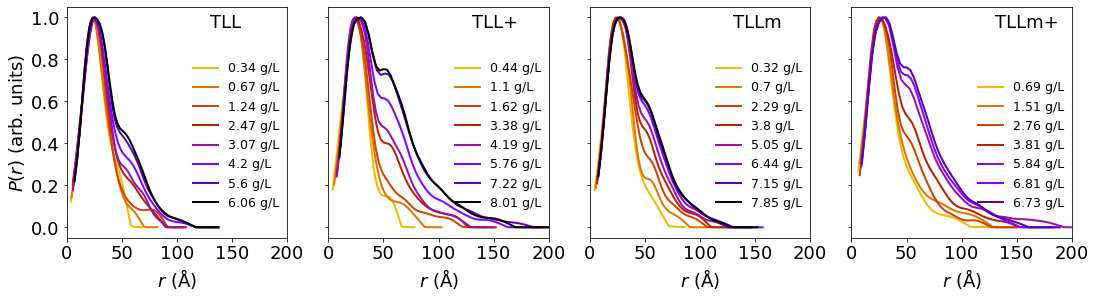

In [3]:
series='TLLm'

def plot_pofr(ax, series):
    if series=="TLLm":
        conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85]
        r8, p8 = np.loadtxt("Pr/series1/Result_RBS_A_02883_A1-T1_lipase_s1_000_c.dat/estimate.d", skiprows=3, usecols=(0,1), unpack=True)
        r7, p7 = np.loadtxt("Pr/series1/Result_RBS_A_02885_B1-T1_lipase_s1_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r6, p6 = np.loadtxt("Pr/series1/Result_RBS_A_02899_C1-T1_lipase_s1_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r5, p5 = np.loadtxt("Pr/series1/Result_RBS_A_02901_D1-T1_lipase_s1_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r4, p4 = np.loadtxt("Pr/series1/Result_RBS_A_02903_E1-T1_lipase_s1_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)  
        r3, p3 = np.loadtxt("Pr/series1/Result_RBS_A_02887_F1-T1_lipase_s1_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r2, p2 = np.loadtxt("Pr/series1/Result_RBS_A_02894_G1-T1_lipase_s1_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r1, p1 = np.loadtxt("Pr/series1/Result_RBS_A_02896_H1-T1_lipase_s1_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)    

    if series=="TLL":
        conc_range = [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06] 
        r8, p8 = np.loadtxt("Pr/series2/Result_RBS_A_02906_A2-T1_lipase_s2_000_c.dat/estimate.d", skiprows=3, usecols=(0,1), unpack=True)
        r7, p7 = np.loadtxt("Pr/series2/Result_RBS_A_02909_B2-T1_lipase_s2_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r6, p6 = np.loadtxt("Pr/series2/Result_RBS_A_02911_C2-T1_lipase_s2_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r5, p5 = np.loadtxt("Pr/series2/Result_RBS_A_02914_D2-T1_lipase_s2_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r4, p4 = np.loadtxt("Pr/series2/Result_RBS_A_02916_E2-T1_lipase_s2_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)  
        r3, p3 = np.loadtxt("Pr/series2/Result_RBS_A_02923_F2-T1_lipase_s2_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r2, p2 = np.loadtxt("Pr/series2/Result_RBS_A_02925_G2.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r1, p1 = np.loadtxt("Pr/series2/Result_RBS_A_02928_H2-T1_lipase_s2_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)

    if series=="TLLm+":
        conc_range = [0.69, 1.51, 2.76, 3.81, 5.84, 6.81, 6.73]
        r7, p7 = np.loadtxt("Pr/series3/Result_RBS_A_02933_A3-T2_lipase_s3_000_c.dat/estimate.d", skiprows=3, usecols=(0,1), unpack=True)
        r6, p6 = np.loadtxt("Pr/series3/Result_RBS_A_02935_B3-T2_lipase_s3_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r5, p5 = np.loadtxt("Pr/series3/Result_RBS_A_02938_C3-T2_lipase_s3_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r4, p4 = np.loadtxt("Pr/series3/Result_RBS_A_02940_D3-T2_lipase_s3_004_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r3, p3 = np.loadtxt("Pr/series3/Result_RBS_A_02944_E3-T2_lipase_s3_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)  
        r2, p2 = np.loadtxt("Pr/series3/Result_RBS_A_02988_F3-T2_lipase_s3_redo_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r1, p1 = np.loadtxt("Pr/series3/Result_RBS_A_02986_G3-T2_lipase_s3_redo_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)    

    if series=="TLL+":
        conc_range = [0.44, 1.10, 1.62, 3.38, 4.19, 5.76, 7.22, 8.01]
        r8, p8 = np.loadtxt("Pr/series4/Result_RBS_A_02955_A4-T2_lipase_s4_000_c.dat/estimate.d", skiprows=3, usecols=(0,1), unpack=True)
        r7, p7 = np.loadtxt("Pr/series4/Result_RBS_A_02977_B4-T2_lipase_s4_redo_002_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r6, p6 = np.loadtxt("Pr/series4/Result_RBS_A_02959_C4-T2_lipase_s4_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r5, p5 = np.loadtxt("Pr/series4/Result_RBS_A_02961_D4-T2_lipase_s4_001_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r4, p4 = np.loadtxt("Pr/series4/Result_RBS_A_02965_E4-T2_lipase_s4_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)  
        r3, p3 = np.loadtxt("Pr/series4/Result_RBS_A_02967_F4-T2_lipase_s4_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r2, p2 = np.loadtxt("Pr/series4/Result_RBS_A_02969_G4-T2_lipase_s4_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)
        r1, p1 = np.loadtxt("Pr/series4/Result_RBS_A_02971_H4-T2_lipase_s4_000_c.dat/estimate.d", skiprows=3, usecols=(0,1),unpack=True)

    ax.plot(r1,p1/max(p1), ls='-', color='#f2bb00', lw=2.0, label=str(conc_range[0])+" g/L")
    ax.plot(r2,p2/max(p2), ls='-', color='#e07600', lw=2.0, label=str(conc_range[1])+" g/L")
    ax.plot(r3,p3/max(p3), ls='-', color='#cc4400', lw=2.0, label=str(conc_range[2])+" g/L")
    ax.plot(r4,p4/max(p4), ls='-', color='#b72300', lw=2.0, label=str(conc_range[3])+" g/L")
    ax.plot(r5,p5/max(p5), ls='-', color='#9e0ea9', lw=2.0, label=str(conc_range[4])+" g/L")
    ax.plot(r6,p6/max(p6), ls='-', color='#8104ff', lw=2.0, label=str(conc_range[5])+" g/L")
    ax.plot(r7,p7/max(p7), ls='-', color='#5a01b5', lw=2.0, label=str(conc_range[6])+" g/L")
    if series!="TLLm+":
        ax.plot(r8,p8/max(p8), ls='-', color='black', lw=2.0, label=str(conc_range[7])+" g/L")

    ax.set_xlabel(r"$r$ (Å)")
    ax.text(130, 0.95, series)
    ax.legend(frameon=False, fontsize='x-small', loc=(0.55,0.1))

plt.rcParams.update({'font.size': 18, 'figure.figsize': [15.0, 4.0]})
fig, axs = plt.subplots(1,4, sharex=True, sharey=True)
plt.tight_layout(pad=0.7)
plt.xlim(0,200)
plot_pofr(axs[0], "TLL")
plot_pofr(axs[1], "TLL+")
plot_pofr(axs[2], "TLLm")
plot_pofr(axs[3], "TLLm+")
axs[0].set_ylabel("$P(r)$ (arb. units)")
plt.savefig('experiment_pofr.pdf', bbox_inches='tight')
plt.show()

In [4]:
%pwd

'/Users/mikael/github/SI-Lipase-Structure-Factors/experiments'